In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, norm, boxcox

sns.color_palette("YlGnBu", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

## 1. Reading and understanding the data

In [2]:
# Reading the training data
data = pd.read_csv('./train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Exploratory Data Analysis (EDA)

### 2.1. Data missing value check
- Percentage of data missing in any of the columns

In [5]:
data = data.drop(columns = 'Id')

In [6]:
columns_with_null = round(data.isnull().sum() / len(data)  * 100, 2)
null_cols = columns_with_null[columns_with_null > 0]
null_cols.sort_values(inplace=True)

null_cols

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageType       5.55
GarageYrBlt      5.55
LotFrontage     17.74
FireplaceQu     47.26
Fence           80.75
Alley           93.77
MiscFeature     96.30
PoolQC          99.52
dtype: float64

### 2.2 Converting values

We will convert the categorical columns with more meaningful value.

- MSSubClass
- OverallQual
- OverallCond


In [7]:
data['MSSubClass'] = data['MSSubClass'].map({20: '1_STORY_1946_NEWER_ALL_STYLES', 30: '1_STORY_1945_OLDER', 40: '1_STORY_W/FINISHED_ATTIC_ALL_AGES', 45: '1-1/2_STORY_UNFINISHED_ALL_AGES', 50: '1-1/2_STORY_FINISHED_ALL_AGES', 60: '2-STORY_1946_&_NEWER', 70: '2-STORY_1945_&_OLDER', 75: '2-1/2_STORY_ALL_AGES', 80: 'SPLIT_OR_MULTI_LEVEL', 85: 'SPLIT_FOYER', 90: 'DUPLEX - ALL STYLES_AND_AGES', 120: '1-STORY_PUD_1946_&_NEWER', 150: '1-1/2_STORY_PUD_ALL_AGES', 160: '2-STORY_PUD_1946_&_NEWER', 180: 'PUD_MULTILEVEL_INCL_SPLIT_LEV/FOYER', 190: '2_FAMILY_CONVERSION_ALL_STYLES_AND_AGES'})
data['OverallQual'] = data['OverallQual'].map({10: 'VeryExcellent', 9: 'Excellent', 8: 'VeryGood', 7: 'Good', 6: 'AboveAverage', 5: 'Average', 4: 'BelowAverage', 3: 'Fair', 2: 'Poor', 1: 'VeryPoor'})
data['OverallCond'] = data['OverallCond'].map({10: 'VeryExcellent', 9: 'Excellent', 8: 'VeryGood', 7: 'Good', 6: 'AboveAverage', 5: 'Average', 4: 'BelowAverage', 3: 'Fair', 2: 'Poor', 1: 'VeryPoor'})

In [8]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY_1946_&_NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1_STORY_1946_NEWER_ALL_STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,AboveAverage,VeryGood,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2-STORY_1946_&_NEWER,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,2-STORY_1945_&_OLDER,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,2-STORY_1946_&_NEWER,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,VeryGood,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Converting datetime variables to age

In [9]:
data['HouseAge'] = data['YearBuilt'].apply(lambda x: (pd.datetime.now().year - x))
data['RemodelAge'] = data['YearRemodAdd'].apply(lambda x: (pd.datetime.now().year - x))
data['GarageAge'] = data['GarageYrBlt'].apply(lambda x: (pd.datetime.now().year - x))
data['SoldAge'] = data['YrSold'].apply(lambda x: (pd.datetime.now().year - x))

data = data.drop(columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])

**Checking null values again**

In [10]:
columns_with_null = round(data.isnull().sum() / len(data)  * 100, 2)
null_cols = columns_with_null[columns_with_null > 0]
null_cols

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
GarageAge        5.55
dtype: float64

### 2.3 Bivariate Analysis

1. `Column`: MSSubClass

Here we see sale with type of dwelling 2 STORY 1946 & NEWER has the highest sale price of around `240000`.

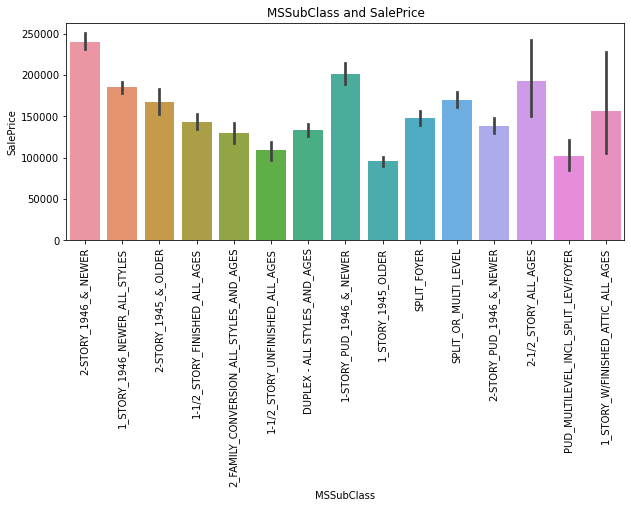

In [11]:
plt.figure(figsize=(10, 4))
plt.title('MSSubClass and SalePrice')
sns.barplot(x='MSSubClass', y='SalePrice', data=data)
plt.xticks(rotation='vertical')

plt.show()

2. `Column`: MSZoning

Here we see sale in zone `Floating Village Residential` has the highest sale price of more than `200000`.

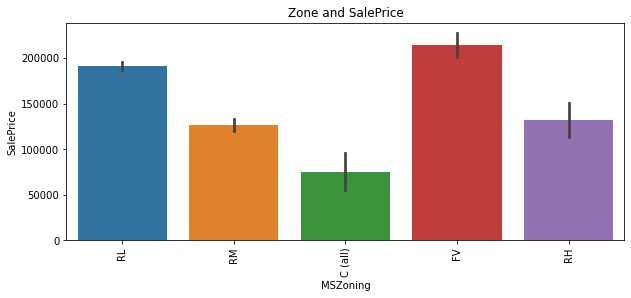

In [12]:
plt.figure(figsize=(10, 4))
plt.title('Zone and SalePrice')
sns.barplot(x='MSZoning', y='SalePrice', data=data)
plt.xticks(rotation='vertical')

plt.show()

3. `Column`: LotShape

Property with shape Moderately Irregular has the highest sale price

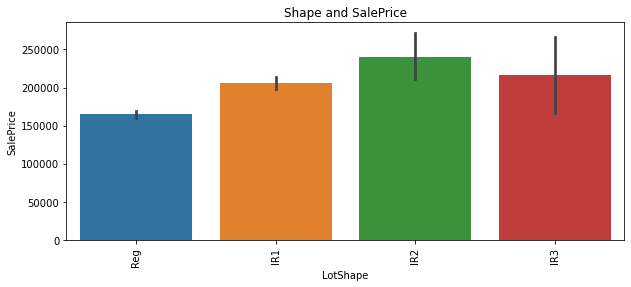

In [13]:
plt.figure(figsize=(10, 4))
plt.title('Shape and SalePrice')
sns.barplot(x='LotShape', y='SalePrice', data=data)
plt.xticks(rotation='vertical')

plt.show()

4. `Column`: Utilities

Houses that has all public utilities installed have the highest sale price

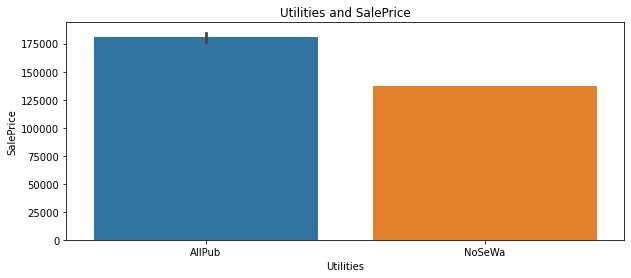

In [14]:
plt.figure(figsize=(10, 4))
plt.title('Utilities and SalePrice')
sns.barplot(x='Utilities', y='SalePrice', data=data)

plt.show()

5. `Column`: BldgType

Houses that are of `Single-family Detached` has the highest sale price followed by `Townhouse End Unit`

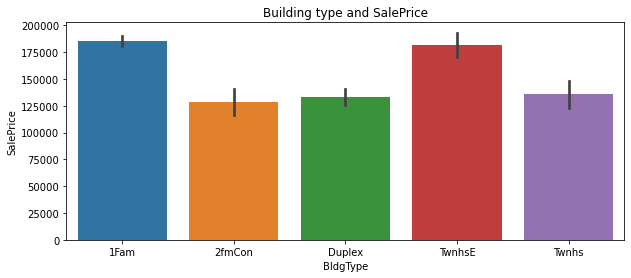

In [15]:
plt.figure(figsize=(10, 4))
plt.title('Building type and SalePrice')
sns.barplot(x='BldgType', y='SalePrice', data=data)

plt.show()

6. `Column`: RoofStyle

Houses that have `Shed` style roof style has the highest sale price followed by `Hip`.

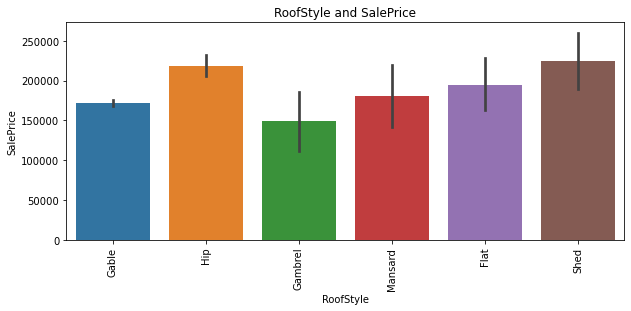

In [16]:
plt.figure(figsize=(10, 4))
plt.title('RoofStyle and SalePrice')
sns.barplot(x='RoofStyle', y='SalePrice', data=data)
plt.xticks(rotation='vertical')

plt.show()

7. `Column`: ExterCond

Houses that have excelent exterior condition have the highest price.

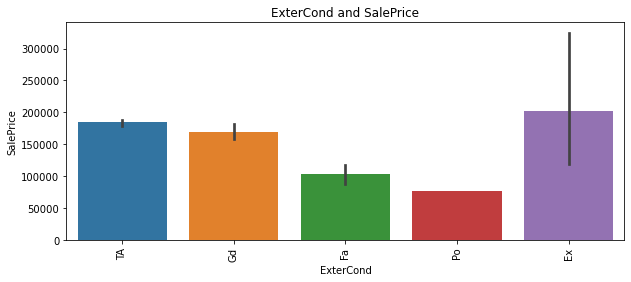

In [17]:
plt.figure(figsize=(10, 4))
plt.title('ExterCond and SalePrice')
sns.barplot(x='ExterCond', y='SalePrice', data=data)
plt.xticks(rotation='vertical')

plt.show()

8. `Column`: BsmtCond

Houses with basement condition with Good condition (4.0) are the one that have higesht sale price of more than `200000`

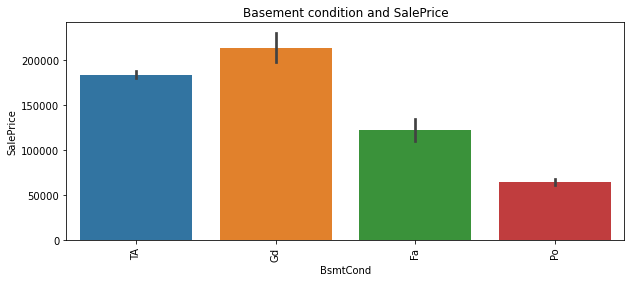

In [18]:
plt.figure(figsize=(10, 4))
plt.title('Basement condition and SalePrice')
sns.barplot(x='BsmtCond', y='SalePrice', data=data)
plt.xticks(rotation='vertical')

plt.show()

9. `Column`: GarageQual

Houses with Garage quaility `Excellent have the highest price

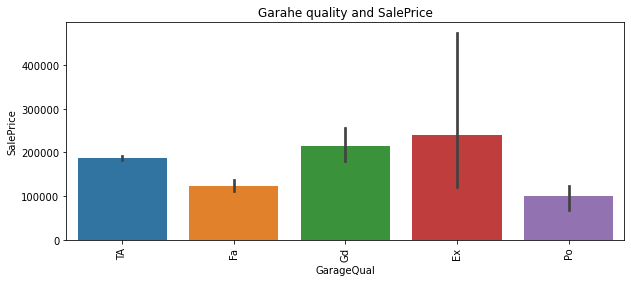

In [19]:
plt.figure(figsize=(10, 4))
plt.title('Garahe quality and SalePrice')
sns.barplot(x='GarageQual', y='SalePrice', data=data)
plt.xticks(rotation='vertical')

plt.show()

### 2.4 Handling missing values

For columns with 40% or less than null, values, let us check what method we can adopt to impute them.

- Imputing null values of number dtype columns with their mean
- Imputing null values of object dtype columns with mode

Here we drop `FireplaceQu`, `Fence`, `MiscFeature`, `Alley`, `PoolQC` right away, as they have more than 40% data missing

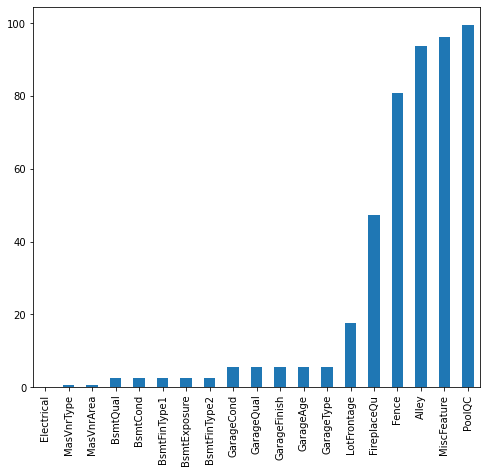

In [20]:
f, ax = plt.subplots(figsize=(8, 7))
null_cols.sort_values().plot.bar()

In [21]:
data = data.drop(columns=['FireplaceQu', 'Fence', 'MiscFeature', 'Alley', 'PoolQC'])

In [22]:
columns_with_null = round(data.isnull().sum() / len(data)  * 100, 2)
null_cols = columns_with_null[columns_with_null > 0]
null_cols.sort_values(inplace=True)

null_cols

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
GarageAge        5.55
LotFrontage     17.74
dtype: float64

In [23]:
numerical_null = data[null_cols.index].select_dtypes(exclude=['object']).columns
null_cols[numerical_null]

MasVnrArea      0.55
GarageAge       5.55
LotFrontage    17.74
dtype: float64

##### Dropping variables with more than 40% missing values

In [24]:
high_num_null_cols = list(numerical_null[null_cols[numerical_null] > 40])
data = data.drop(columns=high_num_null_cols)

##### Replacing values with mean for the columns that has less than 40% missing values

In [25]:
low_num_null_cols = list(numerical_null[null_cols[numerical_null] <= 40])
data[low_num_null_cols] = data[low_num_null_cols].fillna(data[low_num_null_cols].mean())

- Handling categorical variables that has null values

In [26]:
columns_with_null = round(data.isnull().sum() / len(data)  * 100, 2)
null_cols = columns_with_null[columns_with_null > 0]

cat_null = data[null_cols.index].select_dtypes(include=['object']).columns
null_cols[cat_null]

MasVnrType      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

##### Dropping variables with more than 40% missing values

In [27]:
high_cat_null_cols = list(cat_null[null_cols[cat_null] > 40])
data = data.drop(columns=high_cat_null_cols)

##### Replacing values with mean for the columns that has less than 40% missing values

In [28]:
low_cat_null_cols = list(cat_null[null_cols[cat_null] <= 40])
data[low_cat_null_cols] = data[low_cat_null_cols].fillna(data[low_cat_null_cols].mode().iloc[0])

#### Checking if any null values are there after above process

In [29]:
columns_with_null = round(data.isnull().sum() / len(data)  * 100, 2)
null_cols = columns_with_null[columns_with_null > 0]
null_cols

Series([], dtype: float64)

In [30]:
data.shape

(1460, 75)

### 2.5 Correlation

Finding correlation between the columns, now since we have lots of variables is why we will filter all those with below function.

We will drop all those variables that has correlation higher than 0.7

In [31]:
def get_corr_features(df, target=None, thres=0.8):
    corr_df = df.copy()
    if target is not None:
        corr_df = df.drop(columns = target)
    
    corr = corr_df.corr()
    
    cols = corr.columns
    corr_feature = set()
    
    for i in range(len(cols)):
        for j in range(i):
            if abs(corr.iloc[i, j]) >= thres:
                corr_feature.add(cols[i])
    
    return corr_feature

In [32]:
high_corr = get_corr_features(data, 'SalePrice', thres=0.7)

if len(high_corr) > 0:
    print('High corr feature found', len(high_corr))
    data = data.drop(columns=list(high_corr))

High corr feature found 4


In [33]:
data.shape

(1460, 71)

### 2.6 Outliers and Skewed Columns

Checking outliers and will drop all those variables that are highly skewed either to left or right (These are variables that are not normally distributed). 

**Note** Above is done only for the independent variables and not for the dependent variable (SalePrice).



We can see here the target variable `SalePrice` isn't normally distributed, and this is a problem as the ML Algorithm don't do well with skewed data.

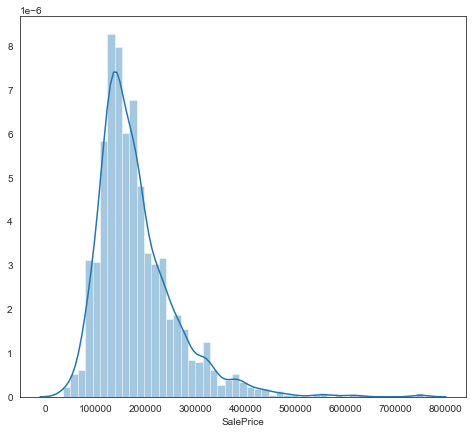

In [34]:
sns.set_style("white")
plt.subplots(figsize=(8, 7))
sns.distplot(data['SalePrice']);
ax.set(xlabel="SalePrice")
plt.show()

To treat the skeweness we will apply `log` transformation

In [35]:
data['SalePrice'] = data['SalePrice'].apply(lambda x: np.log(x))

Let us look at the SalePrice again

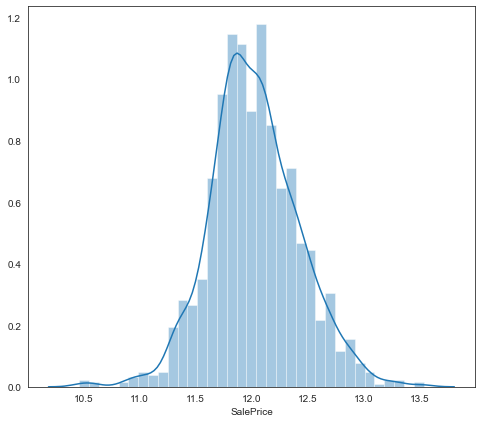

In [36]:
#Check the new distribution 
sns.set_style("white")
plt.subplots(figsize=(8, 7))
sns.distplot(data['SalePrice']);
ax.set(xlabel="SalePrice")
plt.show()

### Checking the skewness of the number columns

We will drop the variables that has skewnes more than 5

In [37]:
number_data = data.select_dtypes(exclude='object')

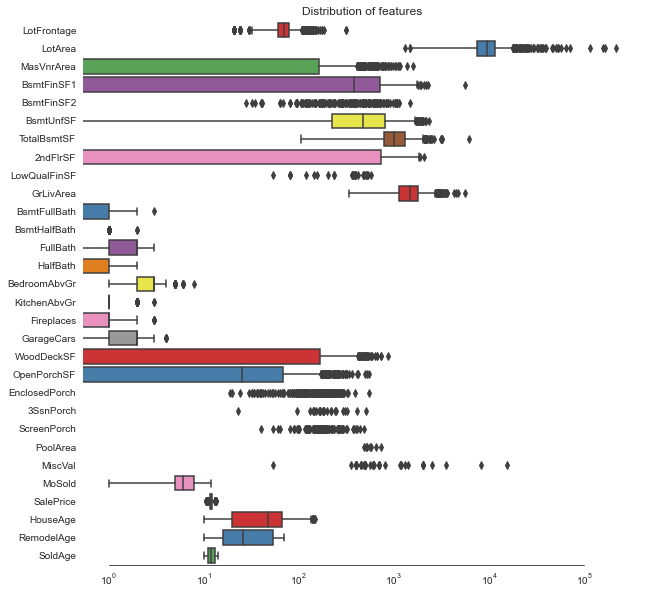

In [38]:
f, ax = plt.subplots(figsize=(10, 10))
ax.set_xscale("log")
ax = sns.boxplot(data=number_data , orient="h", palette="Set1")
# ax.xaxis.grid(False)
ax.set(title="Distribution of features")
sns.despine(trim=True, left=True)

In [39]:
skewed_variables = number_data.apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_variables[skewed_variables > 0.5]

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
HalfBath          0.675203
Fireplaces        0.648898
HouseAge          0.612831
BsmtFullBath      0.595454
RemodelAge        0.503044
dtype: float64

In [40]:
def plot_outliers(data, cols):
    figure = 1
    row = 1
    plt.figure(figsize=(15, 15))
    for i in range(len(cols)):
        fig = str(9) + "3" + str(figure)
        plt.subplot(int(fig))
        sns.boxplot(data[cols[i]])
        if figure == 3:
            plt.figure(figsize=(15, 15))
            figure = 1
            row += 1
        else:
            figure += 1

    plt.show()
    
def plot_dist(data, cols):
    figure = 1
    row = 1
    plt.figure(figsize=(15, 15))
    for i in range(len(cols)):
        try:
            fig = str(9) + "3" + str(figure)
            plt.subplot(int(fig))
            sns.distplot(data[cols[i]])
            if figure == 3:
                plt.figure(figsize=(15, 15))
                figure = 1
                row += 1
            else:
                figure += 1
        except:
            print("Error plotting column ", cols[i])

    plt.show()

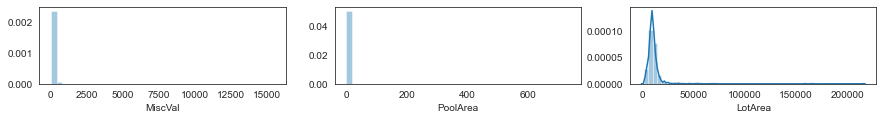

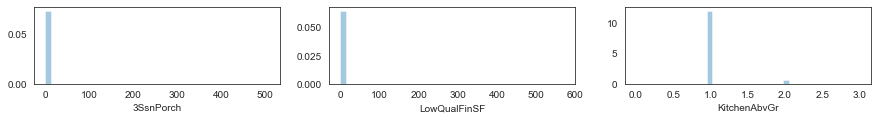

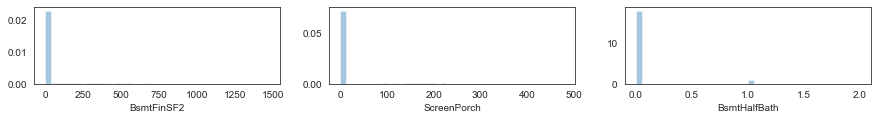

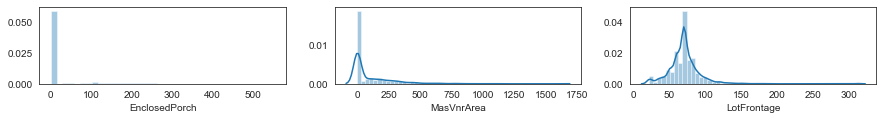

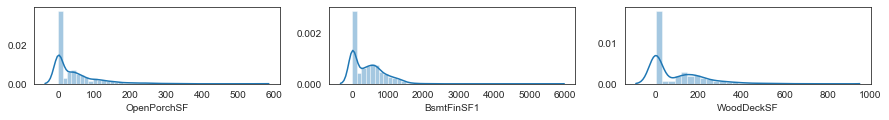

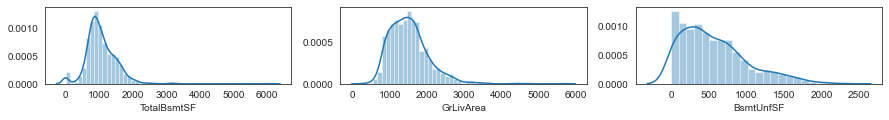

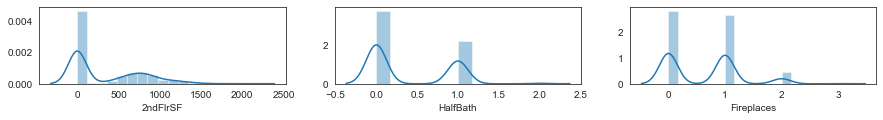

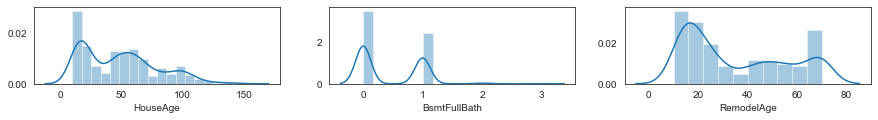

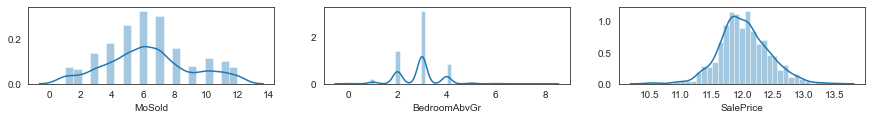

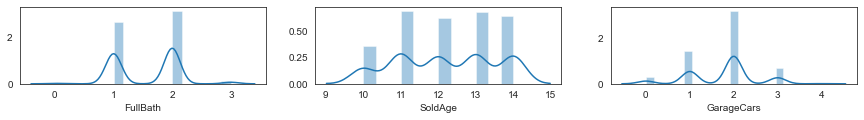

<Figure size 1080x1080 with 0 Axes>

In [41]:
plot_dist(data[skewed_variables.index], skewed_variables.index)

Columns that are highly skewed are

MiscVal, PoolArea, 3SsnPorch, LowQualFinSF, KitchenAbvGr, ScreenPorch, BsmtHalfBath, BsmtFinType2, EnclosedPorch, MasVnrArea, OpenPorchSF, WoodDeckSF, 2ndFlrSF, HalfBath, Fireplaces, BsmtFullBath, BedroomAbvGr, FullBath

In [42]:
data = data.drop(columns=['MiscVal', 'PoolArea', 'BsmtFinSF2', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr', 'ScreenPorch', 'BsmtHalfBath', 'BsmtFinType2', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'HalfBath', 'Fireplaces', 'BsmtFullBath', 'BedroomAbvGr', 'FullBath', 'BsmtFinSF1'])
data.shape

(1460, 51)

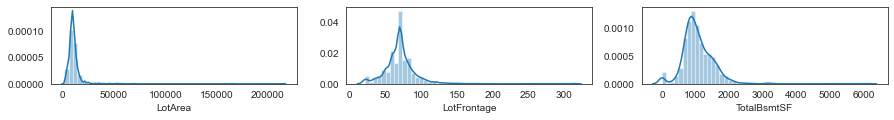

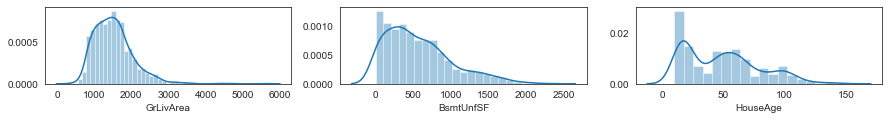

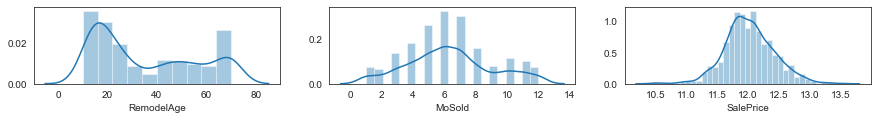

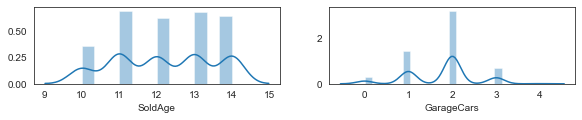

In [43]:
skewed_variables = data.select_dtypes(exclude='object').apply(lambda x: skew(x)).sort_values(ascending=False)
plot_dist(data[skewed_variables.index], skewed_variables.index)


Here we will trasform each variable with an appropriate funtion

In [44]:
log_transform = ['LotArea', 'LotFrontage', 'GrLivArea']
sqrt_transform = ['TotalBsmtSF', 'BsmtUnfSF']

data[log_transform] = data[log_transform].apply(lambda x: np.log(x))
data[sqrt_transform] = data[sqrt_transform].apply(lambda x: np.sqrt(x))

In [45]:
data['SoldAge'] = data['SoldAge'].map({11: 'ElevenYears', 13: 'ThirteenYears', 14: 'FourteenYears', 12: 'TwelveYears', 10: 'TenYears'})
data['MoSold'] = data['MoSold'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
data['GarageCars'] = data['GarageCars'].map({0: 'NoGarage', 1: 'OneCar', 2: 'TwoCars', 3: 'ThreeCars', 4: 'FourCars'})
data = data.drop(columns=['HouseAge', 'RemodelAge', 'MoSold'])

## 3. Data Preprocessing

### 3.1. Dummy Variables

Creating dummy variables of all below categorical variables. After creating the dummy variable, the original columns will also be droped.


We see below all selected `cat_cols` are categorical columns

In [46]:
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print()
    print('For col', col)
    print(data[col].value_counts())


For col MSSubClass
1_STORY_1946_NEWER_ALL_STYLES              536
2-STORY_1946_&_NEWER                       299
1-1/2_STORY_FINISHED_ALL_AGES              144
1-STORY_PUD_1946_&_NEWER                    87
1_STORY_1945_OLDER                          69
2-STORY_PUD_1946_&_NEWER                    63
2-STORY_1945_&_OLDER                        60
SPLIT_OR_MULTI_LEVEL                        58
DUPLEX - ALL STYLES_AND_AGES                52
2_FAMILY_CONVERSION_ALL_STYLES_AND_AGES     30
SPLIT_FOYER                                 20
2-1/2_STORY_ALL_AGES                        16
1-1/2_STORY_UNFINISHED_ALL_AGES             12
PUD_MULTILEVEL_INCL_SPLIT_LEV/FOYER         10
1_STORY_W/FINISHED_ATTIC_ALL_AGES            4
Name: MSSubClass, dtype: int64

For col MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

For col Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

For col LotShape
Reg    925
IR1    484
IR2     

In [47]:
cat_dummies = pd.get_dummies(data[cat_cols], drop_first=True)
data = data.drop(columns=cat_cols)
data = pd.concat([data, cat_dummies], axis=1)

In [48]:
data.head()

,LotFrontage,LotArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,SalePrice,MSSubClass_1-1/2_STORY_UNFINISHED_ALL_AGES,MSSubClass_1-STORY_PUD_1946_&_NEWER,MSSubClass_1_STORY_1945_OLDER,MSSubClass_1_STORY_1946_NEWER_ALL_STYLES,MSSubClass_1_STORY_W/FINISHED_ATTIC_ALL_AGES,MSSubClass_2-1/2_STORY_ALL_AGES,MSSubClass_2-STORY_1945_&_OLDER,MSSubClass_2-STORY_1946_&_NEWER,MSSubClass_2-STORY_PUD_1946_&_NEWER,MSSubClass_2_FAMILY_CONVERSION_ALL_STYLES_AND_AGES,MSSubClass_DUPLEX - ALL STYLES_AND_AGES,MSSubClass_PUD_MULTILEVEL_INCL_SPLIT_LEV/FOYER,MSSubClass_SPLIT_FOYER,MSSubClass_SPLIT_OR_MULTI_LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_BelowAverage,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_VeryExcellent,OverallQual_VeryGood,OverallQual_VeryPoor,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_VeryGood,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_NoGarage,GarageCars_OneCar,GarageCars_ThreeCars,GarageCars_TwoCars,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleT

In [49]:
data.shape

(1460, 236)

In [50]:
train, test = train_test_split(data, train_size=0.8, random_state=100)

train.shape

(1168, 236)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 133 to 792
Columns: 236 entries, LotFrontage to SoldAge_TwelveYears
dtypes: float64(6), uint8(230)
memory usage: 326.2 KB


In [52]:
y_train = train['SalePrice']
X_train = train.drop('SalePrice', axis=1)

In [53]:
# scaler = MinMaxScaler()
# cols = X_train.columns
# X_train[cols] = scaler.fit_transform(X_train)
X_train.head()

,LotFrontage,LotArea,BsmtUnfSF,TotalBsmtSF,GrLivArea,MSSubClass_1-1/2_STORY_UNFINISHED_ALL_AGES,MSSubClass_1-STORY_PUD_1946_&_NEWER,MSSubClass_1_STORY_1945_OLDER,MSSubClass_1_STORY_1946_NEWER_ALL_STYLES,MSSubClass_1_STORY_W/FINISHED_ATTIC_ALL_AGES,MSSubClass_2-1/2_STORY_ALL_AGES,MSSubClass_2-STORY_1945_&_OLDER,MSSubClass_2-STORY_1946_&_NEWER,MSSubClass_2-STORY_PUD_1946_&_NEWER,MSSubClass_2_FAMILY_CONVERSION_ALL_STYLES_AND_AGES,MSSubClass_DUPLEX - ALL STYLES_AND_AGES,MSSubClass_PUD_MULTILEVEL_INCL_SPLIT_LEV/FOYER,MSSubClass_SPLIT_FOYER,MSSubClass_SPLIT_OR_MULTI_LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_BelowAverage,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_VeryExcellent,OverallQual_VeryGood,OverallQual_VeryPoor,OverallCond_Average,OverallCond_BelowAverage,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_VeryGood,OverallCond_VeryPoor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageCars_NoGarage,GarageCars_OneCar,GarageCars_ThreeCars,GarageCars_TwoCars,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,Sa

## 3. Model Building and Evaluation


### 3.1 Ridge

In [54]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# params = {'alpha': [9.4]}

ridge = Ridge()

# cross validation
folds = 4
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    2.3s finished


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.5, 5.6,
                                   5.7, 5.8, 5.9, 6.0, 6.1, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.011667,0.004271,0.005331,0.000181,0.0001,{'alpha': 0.0001},-0.098567,-0.090439,-0.097356,-0.082226,-0.092147,0.006513,37,-0.057261,-0.061525,-0.062357,-0.062826,-0.060992,0.002204
1,0.006922,0.001397,0.003493,0.000676,0.001,{'alpha': 0.001},-0.098536,-0.090403,-0.097307,-0.082198,-0.092111,0.006509,36,-0.057284,-0.061526,-0.062368,-0.062845,-0.061006,0.002200
2,0.005903,0.000361,0.003351,0.000322,0.01,{'alpha': 0.01},-0.098336,-0.090079,-0.097004,-0.082349,-0.091942,0.006364,35,-0.057590,-0.061534,-0.062530,-0.063070,-0.061181,0.002145
3,0.006861,0.000484,0.003869,0.000447,0.05,{'alpha': 0.05},-0.098017,-0.089344,-0.096644,-0.083050,-0.091764,0.006015,33,-0.058983,-0.061604,-0.063439,-0.064314,-0.062085,0.002041
4,0.007625,0.000635,0.003646,0.000765,0.1,{'alpha': 0.1},-0.098238,-0.088969,-0.096377,-0.083634,-0.091804,0.005854,34,-0.060108,-0.061766,-0.064287,-0.065519,-0.062920,0.002113


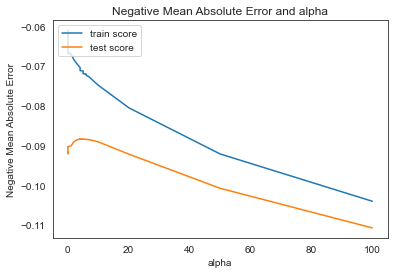

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
ridge = model_cv.best_estimator_
ridge

Ridge(alpha=4.7)

In [58]:
sorted(zip(map(lambda x: round(x, 3), ridge.coef_), X_train.columns), reverse=True)

[(0.423, 'GrLivArea'),
 (0.157, 'OverallQual_Excellent'),
 (0.13, 'MSZoning_FV'),
 (0.1, 'Neighborhood_Crawfor'),
 (0.098, 'OverallCond_Excellent'),
 (0.097, 'Neighborhood_NoRidge'),
 (0.093, 'RoofMatl_WdShngl'),
 (0.092, 'SaleType_ConLD'),
 (0.091, 'OverallQual_VeryGood'),
 (0.088, 'MSZoning_RL'),
 (0.087, 'Neighborhood_NridgHt'),
 (0.086, 'Neighborhood_StoneBr'),
 (0.083, 'CentralAir_Y'),
 (0.079, 'Functional_Typ'),
 (0.079, 'Condition2_Norm'),
 (0.075, 'MSZoning_RH'),
 (0.074, 'LotArea'),
 (0.072, 'OverallQual_VeryExcellent'),
 (0.072, 'Condition2_PosA'),
 (0.068, 'Exterior1st_BrkFace'),
 (0.065, 'OverallCond_VeryGood'),
 (0.062, 'RoofMatl_CompShg'),
 (0.061, 'SaleCondition_Normal'),
 (0.059, 'Condition1_Norm'),
 (0.058, 'MSZoning_RM'),
 (0.058, 'BsmtExposure_Gd'),
 (0.054, 'Neighborhood_Somerst'),
 (0.052, 'Neighborhood_ClearCr'),
 (0.051, 'GarageQual_Gd'),
 (0.05, 'GarageCars_ThreeCars'),
 (0.049, 'Condition1_RRNn'),
 (0.047, 'SaleCondition_AdjLand'),
 (0.046, 'OverallCond_Good'),

In [59]:
y_train_pred = model_cv.predict(X_train)
print('MSE Score', round(mean_squared_error(y_true=y_train, y_pred=y_train_pred), 2))
print('r2 score', round(r2_score(y_true=y_train, y_pred=y_train_pred), 2))


MSE Score 0.01
r2 score 0.93


Test data accuracy

In [60]:
y_test = test['SalePrice']
X_test = test.drop(columns = 'SalePrice')

In [61]:
y_test_pred = model_cv.predict(X_test)
print('MSE Score', round(mean_squared_error(y_true=y_test, y_pred=y_test_pred), 2))
print('r2 score', round(r2_score(y_true=y_test, y_pred=y_test_pred), 2))

MSE Score 0.02
r2 score 0.9


### 3.2 Lasso

In [62]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# params = {'alpha': [0.0002]}


# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 4 folds for each of 42 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:    2.1s finished


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.5, 5.6,
                                   5.7, 5.8, 5.9, 6.0, 6.1, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.044984,0.006270,0.003759,0.000457,0.0001,{'alpha': 0.0001},-0.094321,-0.086277,-0.093571,-0.077894,-0.088016,0.006635,1,-0.062400,-0.064101,-0.066278,-0.068080,-0.065215,0.002151
1,0.009442,0.000649,0.003133,0.000328,0.001,{'alpha': 0.001},-0.093077,-0.091566,-0.095787,-0.082043,-0.090618,0.005177,2,-0.077938,-0.079007,-0.078115,-0.082020,-0.079270,0.001638
2,0.007125,0.000830,0.003353,0.000642,0.01,{'alpha': 0.01},-0.120058,-0.122396,-0.128848,-0.126690,-0.124498,0.003459,3,-0.121280,-0.122357,-0.120814,-0.122315,-0.121692,0.000665
3,0.005313,0.000081,0.002776,0.000032,0.05,{'alpha': 0.05},-0.200567,-0.192571,-0.204409,-0.208120,-0.201417,0.005763,4,-0.199895,-0.197884,-0.199596,-0.202815,-0.200047,0.001772
4,0.004953,0.000113,0.002772,0.000020,0.1,{'alpha': 0.1},-0.262503,-0.254513,-0.259902,-0.262564,-0.259870,0.003274,6,-0.258518,-0.260673,-0.258309,-0.257777,-0.258819,0.001104


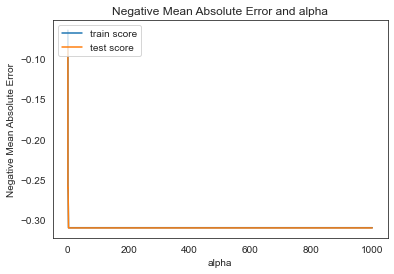

In [64]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [65]:
lasso = model_cv.best_estimator_
lasso

Lasso(alpha=0.0001)

In [66]:
sorted(zip(map(lambda x: round(x, 3), lasso.coef_), X_train.columns), reverse=True)

[(0.543, 'RoofMatl_WdShngl'),
 (0.481, 'GrLivArea'),
 (0.477, 'RoofMatl_CompShg'),
 (0.414, 'RoofMatl_WdShake'),
 (0.406, 'RoofMatl_Tar&Grv'),
 (0.395, 'MSZoning_FV'),
 (0.369, 'RoofMatl_Membran'),
 (0.322, 'RoofMatl_Metal'),
 (0.315, 'MSZoning_RH'),
 (0.313, 'MSZoning_RL'),
 (0.309, 'RoofMatl_Roll'),
 (0.28, 'MSZoning_RM'),
 (0.238, 'Condition2_PosA'),
 (0.198, 'SaleType_ConLD'),
 (0.185, 'OverallQual_Excellent'),
 (0.156, 'OverallQual_VeryExcellent'),
 (0.125, 'OverallCond_Excellent'),
 (0.108, 'Neighborhood_Crawfor'),
 (0.099, 'OverallQual_VeryGood'),
 (0.097, 'Neighborhood_NoRidge'),
 (0.091, 'Functional_Typ'),
 (0.09, 'SaleCondition_AdjLand'),
 (0.09, 'Condition1_RRNn'),
 (0.085, 'Condition2_RRNn'),
 (0.082, 'Neighborhood_StoneBr'),
 (0.076, 'OverallCond_VeryGood'),
 (0.076, 'Neighborhood_NridgHt'),
 (0.074, 'CentralAir_Y'),
 (0.073, 'Foundation_Stone'),
 (0.071, 'LotArea'),
 (0.068, 'Condition1_Norm'),
 (0.065, 'Exterior1st_BrkFace'),
 (0.065, 'Condition2_Norm'),
 (0.063, 'BsmtEx

In [67]:
y_train_pred = lasso.predict(X_train)
print('MSE Score', round(mean_squared_error(y_true=y_train, y_pred=y_train_pred), 2))
print('r2 score', round(r2_score(y_true=y_train, y_pred=y_train_pred), 2))

MSE Score 0.01
r2 score 0.94


In [68]:
y_test_pred = lasso.predict(X_test)
print('MSE Score', round(mean_squared_error(y_true=y_test, y_pred=y_test_pred), 2))
print('r2 score', round(r2_score(y_true=y_test, y_pred=y_test_pred), 2))

MSE Score 0.02
r2 score 0.89
